# Discounts on Poshmark

In [ ]:
options(repr.plot.width=6, repr.plot.height=6)
knitr::opts_chunk$set(fig.width=6, fig.height=6)
if (!require("rvest")) install.packages("rvest")
library("rvest")

Here we will show how to do webscraping with rvest and the chrome
extension selector gadget. This technique is borrowed from the great
explanation at: [Online Bargin Hunting in R with
rvest](https://jef.works/blog/2019/01/12/online-bargain-hunting-in-R-with-rvest/)
and is basically a simplified version of that description

So say we want to pull some data from <http://poshmark.com> and compare
original prices with the current price, maybe to find excellent bargins.
We will look in the category Jackets and Coats-Blazers, and we will just
use the data we find on the first page:

In [ ]:
url <- 'https://poshmark.com/category/Women-Jackets_&_Coats-Blazers?max_id=1'
webpage <- read_html(url)

We just pull the webpage once, then we look for our fields using that
pulled page.

Lets look for the title of the item first;

In [ ]:
nodes<- html_nodes(webpage,'.tc--b')
title <- html_text(nodes)
# This removes some weird non-ascii chars in the title
title <- iconv(title, to="ASCII", sub="")
title<-trimws(title)
str(title)

 chr [1:48] "Vintage Karet Tweed Blazer Size 20W" ...

 [1] "Vintage Karet Tweed Blazer Size 20W"                    
 [2] "Tahari Tweed Plaid Blazer Jacket Sz 8 Gray Black"       
 [3] "Pinstriped blazer"                                      
 [4] "White Floral blazer NIPN BOUTIQUE SIZE 4"               
 [5] "Eileen Fisher Wool Blend Petite Open Blazer"            
 [6] "DIANE VON FURSTENBERG Plaid Belted Vintage Blazer"      
 [7] "Banana Republic Tweed Fringe Jacket Blazer"             
 [8] "Velvety Black Blazer by Villager Size 14"               
 [9] "Miss Me Vintage Camo Hooded Shirt Jacket Size Small NEW"
[10] "DONNA KARAN Black blazer sweater 6"                     

Next we look for the prices:

In [ ]:
nodes <- html_nodes(webpage,'.fw--bold')
price <- html_text(nodes)
price <- trimws(price)
price<-gsub("$","",price, fixed=TRUE)
#price<-gsub("\u00A0.*","",price)
price<-gsub(",","", price, fixed=TRUE)
price<-as.numeric(price)
str(price)

 num [1:48] 34 24 9 40 30 32 30 38 60 65 ...

 [1] 34 24  9 40 30 32 30 38 60 65

Now lets look for the original price:

In [ ]:
#knitr::knit_exit()
nodes <- html_nodes(webpage,'.td--lt')
original <- html_text(nodes)
original <- trimws(original)
original<-gsub("$","",original, fixed=TRUE)
original<-gsub(",","",original, fixed=TRUE)
original<-as.numeric(original)
str(original)

 num [1:48] 0 0 68 0 0 0 90 0 0 0 ...

 [1]  0  0 68  0  0  0 90  0  0  0

For our discount analysis we exclude the data where the original is 0:

In [ ]:
price <- price[original > 0]
title <- title[original > 0]
original <- original[original > 0]

Lets compute the discount for each item:

In [ ]:
discount <- round(100*(original - price)/original)

Now lets make a dataframe of the info we have:

In [ ]:
df <-data.frame(title, price, original, discount)
df[,c("title","original","discount")]

                                                                           title
1                                                              Pinstriped blazer
2                                     Banana Republic Tweed Fringe Jacket Blazer
3   Hugo Boss Jadela Charcoal Gray Layered Look Asymmetric Jacket Blazer Size 14
4                              Le Suit Black Textured Blazer One Bling Button 12
5                   Womens Talbots Blazer -Size 10 Petite NWT- Color Red- Orange
6                                                   DR2 Grey Plaid Blazer Jacket
7                                              Womens Sweet Suit Blazer- Size 16
8                               Tahari 2 Piece  Houndstooth Suit Blazer Skirt 6P
9         Vintage 60's Jackie O Boucle Wool Blazer Lined Exc Pre-owned Condition
10                                         UNITED COLORS OF BENETTON Blue Blazer
11                                 Chicos Embellished Tweed Blazer Jacket Beaded
12                Bishop + Y

Now lets see the distribution of discounts people are offering:

 [1]  87  67  99  80  88  93  63  68  86  66  75  96  50  77  74  91  78  96 -16
[20]  62  49  75  52

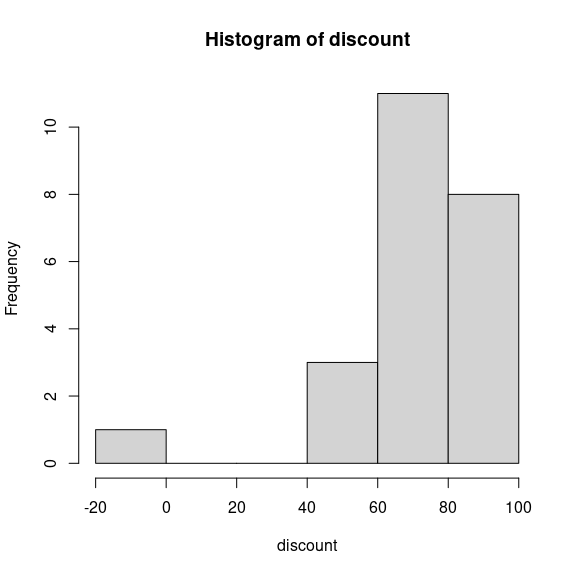

[1] 72

[1] -16  99

In [ ]:
discount

Now lets see the distribution of original prices:

 [1]   68   90 9999  200  188  777   54  200   90  169  159  120  250  150  295
[16]  450 2500  999   25  100  150  598  149

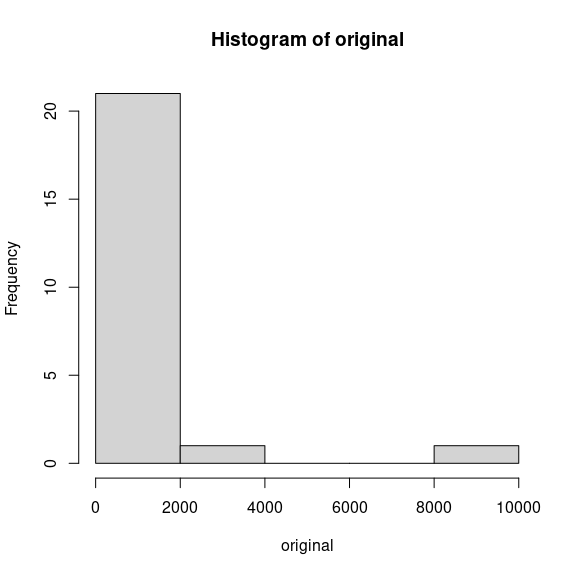

[1] 773.0435

[1]   25 9999

In [ ]:
original

Here is a plot of the original vs the offering price:

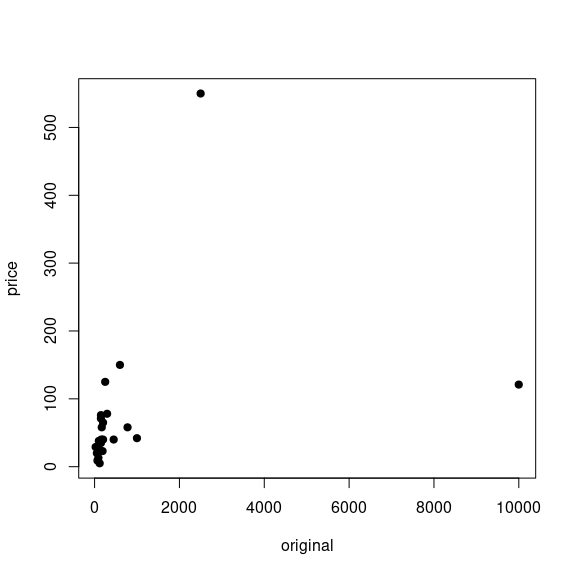

[1] 0.3147586

In [ ]:
plot(original,price, pch=19)